In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma
from scipy.optimize import minimize
from matplotlib import cm as CM

<AxesSubplot:>

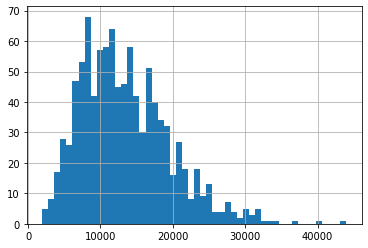

In [2]:
shape, scale = 4.8, 2800
data = pd.Series(gamma(a=shape, scale=scale).rvs(1000))
data.hist(bins=50)

In [3]:
def nll_gamma(vars):
    shape = vars[0]
    scale = vars[1]
    return -data.map(lambda x: gamma.logpdf(x, a=shape, scale=scale)).sum()

In [4]:
best_params = minimize(nll_gamma, [1,1], method='BFGS')
best_params.x.tolist()

[4.710777677360769, 2857.2506955324116]

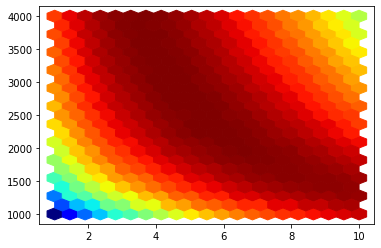

In [5]:
plotter1 = pd.DataFrame([], columns=['x'])
plotter1.x = np.linspace(1, 10, 30)

plotter2 = pd.DataFrame([], columns=['y'])
plotter2.y = np.linspace(1000,4000, 30)

plotter = plotter1.merge(plotter2, how='cross')
plotter['nll'] = plotter.apply(lambda row: -nll_gamma(row.values.tolist()), axis=1)

plt.hexbin(plotter.x, plotter.y, C=plotter.nll, cmap=CM.jet, bins=None, gridsize=20)